In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
mobile_file = 'drive/My Drive/Projects/university/data-mining/hw-3/archive'

In [3]:
train = pd.read_csv(mobile_file + '/train.csv')
test = pd.read_csv(mobile_file + '/test.csv')

In [4]:
train_y = train['price_range']
train_x = train.drop(columns = ['price_range'])

In [23]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.svm import SVC

### without kernel

In [ ]:
clf = make_pipeline(StandardScaler(), SVC(gamma = 'auto', kernel = 'linear'))

In [ ]:
clf.fit(train_x, train_y)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='auto', kernel='linear', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [ ]:
pred = clf.predict(train_x)

In [ ]:
print(classification_report(pred, train_y))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       501
           1       0.98      0.98      0.98       500
           2       0.96      0.98      0.97       493
           3       0.99      0.98      0.98       506

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000



### with rbf kernel

In [ ]:
clf = make_pipeline(StandardScaler(), SVC(gamma = 'auto', kernel = 'rbf'))

In [ ]:
clf.fit(train_x, train_y)
pred = clf.predict(train_x)

In [ ]:
print(classification_report(pred, train_y))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       498
           1       0.98      0.97      0.98       506
           2       0.98      0.97      0.98       503
           3       0.98      1.00      0.99       493

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000



### with poly kernel

In [ ]:
clf = make_pipeline(StandardScaler(), SVC(gamma = 'auto', kernel = 'poly'))

In [ ]:
clf.fit(train_x, train_y)
pred = clf.predict(train_x)

In [ ]:
print(classification_report(pred, train_y))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       484
           1       0.99      0.96      0.97       514
           2       0.99      0.94      0.96       527
           3       0.95      1.00      0.97       475

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000



### with sigmoid kernel

In [ ]:
clf = make_pipeline(StandardScaler(), SVC(gamma = 'auto', kernel = 'sigmoid'))

In [ ]:
clf.fit(train_x, train_y)
pred = clf.predict(train_x)

In [ ]:
print(classification_report(pred, train_y))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92       494
           1       0.85      0.82      0.83       519
           2       0.82      0.82      0.82       498
           3       0.90      0.92      0.91       489

    accuracy                           0.87      2000
   macro avg       0.87      0.87      0.87      2000
weighted avg       0.87      0.87      0.87      2000



### soft-margin vs hard-margin

#### soft-margin

In [ ]:
clf = make_pipeline(StandardScaler(), SVC(gamma = 'auto', kernel = 'linear'))
clf.fit(train_x, train_y)
pred = clf.predict(train_x)
print(classification_report(pred, train_y))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       501
           1       0.98      0.98      0.98       500
           2       0.96      0.98      0.97       493
           3       0.99      0.98      0.98       506

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000



#### hard-margin

In [ ]:
clf = make_pipeline(StandardScaler(), SVC(gamma = 'auto', kernel = 'linear', C = 100000))
clf.fit(train_x, train_y)
pred = clf.predict(train_x)
print(classification_report(pred, train_y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       500
           1       0.99      1.00      0.99       499
           2       0.99      0.99      0.99       500
           3       0.99      0.99      0.99       501

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000



### Feature engineering

#### binning batter_power

In [5]:
sns.set()

In [6]:
train_x['battery_power'].describe()

count    2000.000000
mean     1238.518500
std       439.418206
min       501.000000
25%       851.750000
50%      1226.000000
75%      1615.250000
max      1998.000000
Name: battery_power, dtype: float64

In [7]:
min_value = train_x['battery_power'].max()
max_value = train_x['battery_power'].min()

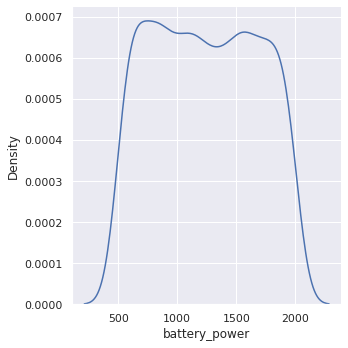

In [8]:
sns.displot(train_x, x = 'battery_power', kind = 'kde')

In [9]:
bins = np.linspace(max_value, min_value, 4)

In [10]:
labels = ['bin1', 'bin2', 'bin3']

In [11]:
train_x['battery_power_bin'] = pd.cut(train_x['battery_power'], bins=bins, labels=labels, include_lowest=True)

In [12]:
train_x['battery_power_bin'].unique()

['bin1', 'bin2', 'bin3']
Categories (3, object): ['bin1' < 'bin2' < 'bin3']

(array([697., 641., 662.]),
 array([0.        , 0.66666667, 1.33333333, 2.        ]),
 <a list of 3 Patch objects>)

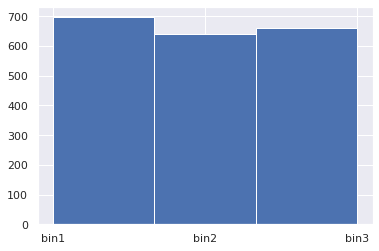

In [13]:
plt.hist(train_x['battery_power_bin'], bins=3)

#### one-hot encoding

In [14]:
train_x.drop(columns = ['battery_power'], inplace = True)

In [17]:
train_x.dtypes

blue                    int64
clock_speed           float64
dual_sim                int64
fc                      int64
four_g                  int64
int_memory              int64
m_dep                 float64
mobile_wt               int64
n_cores                 int64
pc                      int64
px_height               int64
px_width                int64
ram                     int64
sc_h                    int64
sc_w                    int64
talk_time               int64
three_g                 int64
touch_screen            int64
wifi                    int64
battery_power_bin    category
dtype: object

#### categorical feature

battery_power_bin - wifi - blue - dual_sim - four_g - touch_screen

### battery one-hot

In [18]:
battery_dummies = pd.get_dummies(train_x['battery_power_bin'], prefix='battery')
train_x = pd.concat([train_x, battery_dummies], axis = 1)

In [19]:
train_x.drop(columns = ['battery_power_bin'], inplace = True)

In [24]:
clf = make_pipeline(StandardScaler(), SVC(gamma = 'auto', kernel = 'linear'))
clf.fit(train_x, train_y)
pred = clf.predict(train_x)
print(classification_report(pred, train_y))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       499
           1       0.93      0.92      0.92       506
           2       0.92      0.93      0.92       499
           3       0.96      0.97      0.97       496

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000



### wifi one-hot

In [25]:
wifi_dummies = pd.get_dummies(train_x['wifi'], prefix='wifi')
train_x.drop(columns = ['wifi'], inplace = True)

KeyError: ignored

In [26]:
clf = make_pipeline(StandardScaler(), SVC(gamma = 'auto', kernel = 'linear'))
clf.fit(train_x, train_y)
pred = clf.predict(train_x)
print(classification_report(pred, train_y))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       499
           1       0.93      0.92      0.92       506
           2       0.92      0.93      0.92       499
           3       0.96      0.97      0.97       496

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000



### blue one-hot

In [27]:
blue_dummies = pd.get_dummies(train_x['blue'], prefix='blue')
train_x.drop(columns = ['blue'], inplace = True)

In [28]:
clf = make_pipeline(StandardScaler(), SVC(gamma = 'auto', kernel = 'linear'))
clf.fit(train_x, train_y)
pred = clf.predict(train_x)
print(classification_report(pred, train_y))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       501
           1       0.92      0.92      0.92       500
           2       0.93      0.92      0.93       504
           3       0.96      0.97      0.97       495

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000



### dual_sim one-hot

In [29]:
dual_sim_dummies = pd.get_dummies(train_x['dual_sim'], prefix='dual_sim')
train_x.drop(columns = ['dual_sim'], inplace = True)

In [30]:
clf = make_pipeline(StandardScaler(), SVC(gamma = 'auto', kernel = 'linear'))
clf.fit(train_x, train_y)
pred = clf.predict(train_x)
print(classification_report(pred, train_y))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       501
           1       0.92      0.92      0.92       502
           2       0.92      0.92      0.92       500
           3       0.96      0.97      0.97       497

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000



### four_g

In [31]:
four_g_dummies = pd.get_dummies(train_x['four_g'], prefix='four_g')
train_x.drop(columns = ['four_g'], inplace = True)

In [32]:
clf = make_pipeline(StandardScaler(), SVC(gamma = 'auto', kernel = 'linear'))
clf.fit(train_x, train_y)
pred = clf.predict(train_x)
print(classification_report(pred, train_y))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       503
           1       0.93      0.92      0.93       501
           2       0.93      0.93      0.93       497
           3       0.97      0.97      0.97       499

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000



### touch_screen one-hot

In [33]:
touch_dummies = pd.get_dummies(train_x['touch_screen'], prefix='touch')
train_x.drop(columns = ['touch_screen'], inplace = True)

In [34]:
clf = make_pipeline(StandardScaler(), SVC(gamma = 'auto', kernel = 'linear'))
clf.fit(train_x, train_y)
pred = clf.predict(train_x)
print(classification_report(pred, train_y))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       505
           1       0.92      0.92      0.92       499
           2       0.92      0.93      0.92       497
           3       0.97      0.97      0.97       499

    accuracy                           0.94      2000
   macro avg       0.95      0.94      0.94      2000
weighted avg       0.95      0.94      0.95      2000



In [35]:
train_x = pd.concat([train_x, blue_dummies, dual_sim_dummies, battery_dummies, four_g_dummies, touch_dummies], axis = 1)

In [ ]:
# train_x.drop(columns = ['battery_power_bin', 'wifi', 'blue', 'dual_sim', 'four_g', 'touch_screen'], inplace= True)

In [36]:
train_x

,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,battery_bin1,battery_bin2,battery_bin3,blue_0,blue_1,dual_sim_0,dual_sim_1,battery_bin1,battery_bin2,battery_bin3,four_g_0,four_g_1,touch_0,touch_1
0,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0
1,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7,1,0,1,0,0,1,0,1,0,1,0,0,1,0,1
2,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,0,0,1,0,1,1,0,0,0,1,0,1
3,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,1,0,0,0,1,1,0,1,0,0,1,0,1,0
4,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,0,0,1,0,1,1,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.5,0,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0,0,1,0,1,1,0,0,0,1,0,1
1996,2.6,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,0,0,1,0,1,0,1,0,0,1,1,0,0,1
1997,0.9,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,0,0,1,1,0,0,1,0,0,1,0,1,0,1
1998,0.9,4,46,0.1,145,5,5,336,670,869,18,10,19,1,0,0,1,1,0,1,0,0,0,1,0,1,0,1


### add area feature

In [37]:
train_x['area'] = train_x['px_height'] * train_x['px_width']

In [38]:
clf = make_pipeline(StandardScaler(), SVC(gamma = 'auto', kernel = 'linear'))
clf.fit(train_x, train_y)
pred = clf.predict(train_x)
print(classification_report(pred, train_y))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       500
           1       0.93      0.92      0.92       505
           2       0.92      0.93      0.92       499
           3       0.96      0.97      0.97       496

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000



### Decisoin tree

In [ ]:
from sklearn import tree

In [ ]:
clf_tree = tree.DecisionTreeClassifier()

In [ ]:
clf_tree.fit(train_x, train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
pred = clf_tree.predict(train_x)

In [ ]:
print(classification_report(pred, train_y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       500
           1       1.00      1.00      1.00       500
           2       1.00      1.00      1.00       500
           3       1.00      1.00      1.00       500

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



### Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
 clf = RandomForestClassifier(random_state=0)

In [ ]:
clf.fit(train_x, train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
pred = clf.predict(train_x)

In [ ]:
print(classification_report(pred, train_y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       500
           1       1.00      1.00      1.00       500
           2       1.00      1.00      1.00       500
           3       1.00      1.00      1.00       500

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [ ]:
# Bitcoin_Historical_Data.csv

## Bitcoin

In [39]:
bitcoin_file = 'drive/My Drive/Projects/university/data-mining/hw-4/Bitcoin_Historical_Data.csv'

In [40]:
df = pd.read_csv(bitcoin_file)

In [41]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Jan 05, 2021","33,991.5","32,015.4","34,414.7","30,010.5",202.13K,6.15%
1,"Jan 04, 2021","32,022.6","33,016.6","33,587.5","28,204.5",255.27K,-2.84%
2,"Jan 03, 2021","32,958.9","32,192.9","34,755.9","32,029.6",155.21K,2.38%
3,"Jan 02, 2021","32,193.3","29,359.7","33,233.5","29,008.0",240.87K,9.65%
4,"Jan 01, 2021","29,359.9","28,951.7","29,627.1","28,712.4",100.90K,1.42%


In [42]:
from datetime import datetime

In [43]:
def mdy_to_ymd(d):
    return datetime.strptime(d, '%b %d, %Y').strftime('%Y-%m-%d')

In [44]:
df['Date'] = df['Date'].apply(lambda x: mdy_to_ymd(x))

In [45]:
df['Vol.'] = pd.to_numeric(df['Vol.'].apply(lambda x: x[:-1]))
df['Change %'] = pd.to_numeric(df['Change %'].apply(lambda x: x[:-1]))

In [46]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2021-01-05,"33,991.5","32,015.4","34,414.7","30,010.5",202.13,6.15
1,2021-01-04,"32,022.6","33,016.6","33,587.5","28,204.5",255.27,-2.84
2,2021-01-03,"32,958.9","32,192.9","34,755.9","32,029.6",155.21,2.38
3,2021-01-02,"32,193.3","29,359.7","33,233.5","29,008.0",240.87,9.65
4,2021-01-01,"29,359.9","28,951.7","29,627.1","28,712.4",100.90,1.42


In [47]:
def remove_comma(x):
  arr = x.split(',')
  number = ''
  for i in arr:
    number += i
  return float(number)

In [48]:
for column in ['Price', 'Open', 'High', 'Low']:
  df[column] = df[column].apply(remove_comma)

In [49]:
df[df['Date'] == '2020-01-01'].index[0]

370

In [50]:
df['Date'] = pd.to_datetime(df.Date)

In [51]:
df

,Date,Price,Open,High,Low,Vol.,Change %
0,2021-01-05,33991.5,32015.4,34414.7,30010.5,202.13,6.15
1,2021-01-04,32022.6,33016.6,33587.5,28204.5,255.27,-2.84
2,2021-01-03,32958.9,32192.9,34755.9,32029.6,155.21,2.38
3,2021-01-02,32193.3,29359.7,33233.5,29008.0,240.87,9.65
4,2021-01-01,29359.9,28951.7,29627.1,28712.4,100.90,1.42
...,...,...,...,...,...,...,...
3820,2010-07-22,0.1,0.1,0.1,0.1,2.16,0.00
3821,2010-07-21,0.1,0.1,0.1,0.1,0.58,0.00
3822,2010-07-20,0.1,0.1,0.1,0.1,0.26,0.00
3823,2010-07-19,0.1,0.1,0.1,0.1,0.57,0.00


In [52]:
df = df.fillna(0)

In [53]:
test = df.iloc[:371, :]
train = df.iloc[371:, :]

In [54]:
train = train.drop(columns = ['Date'])

In [55]:
test = test.drop(columns = ['Date'])

In [56]:
train.head()

,Price,Open,High,Low,Vol.,Change %
371,7196.4,7261.5,7331.0,7167.4,586.60,-0.90
372,7261.8,7397.5,7420.9,7244.1,606.11,-1.84
373,7397.5,7321.6,7518.9,7303.0,611.69,1.04
374,7321.5,7261.9,7375.9,7256.5,610.96,0.82
375,7261.7,7210.8,7293.8,7128.5,718.07,0.70


In [57]:
test.head()

,Price,Open,High,Low,Vol.,Change %
0,33991.5,32015.4,34414.7,30010.5,202.13,6.15
1,32022.6,33016.6,33587.5,28204.5,255.27,-2.84
2,32958.9,32192.9,34755.9,32029.6,155.21,2.38
3,32193.3,29359.7,33233.5,29008.0,240.87,9.65
4,29359.9,28951.7,29627.1,28712.4,100.90,1.42


In [58]:
train_y = train['Price']
train_x = train.drop(columns = ['Price'])

test_y = test['Price']
test_x = test.drop(columns = ['Price'])

In [65]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, BayesianRidge
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor


In [ ]:
models = {
    'LinearRegression':LinearRegression(),
    'Ridge':Ridge(),
    'Lasso':Lasso(),
    'DecisionTreeRegressor':DecisionTreeRegressor(),
    'RandomForestRegressor':RandomForestRegressor(),
    'AdaBoostRegressor':AdaBoostRegressor(),
    'GradientBoostingRegressor':GradientBoostingRegressor(),
    'BayesianRidge()':BayesianRidge(),
}

In [ ]:
for name, model in models.items():
  model.fit(train_x, train_y)
  train_pred = model.predict(train_x)
  train_mse = mean_squared_error(train_y, train_pred)

  test_pred = model.predict(test_x)
  test_mse = mean_squared_error(test_y, test_pred)

  print('{} --> train mse: {:0.4f} ,  test mse: {:0.4f} \n'.format(name, train_mse, test_mse))


LinearRegression --> train mse: 6072.6493 ,  test mse: 39162.6274 

Ridge --> train mse: 6072.6493 ,  test mse: 39162.6307 

Lasso --> train mse: 7252.6713 ,  test mse: 43258.4955 

DecisionTreeRegressor --> train mse: 0.0000 ,  test mse: 4010967.5819 



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12534090.924761625, tolerance: 4104365.0088528185
  positive)


RandomForestRegressor --> train mse: 1090.4298 ,  test mse: 4138685.4864 

AdaBoostRegressor --> train mse: 66826.7938 ,  test mse: 4728619.8880 

GradientBoostingRegressor --> train mse: 1496.7909 ,  test mse: 4076197.0881 

BayesianRidge() --> train mse: 6072.8738 ,  test mse: 39207.8160 



## Voting

In [ ]:
from sklearn.ensemble import VotingRegressor

In [ ]:
vot_model = VotingRegressor([('BayesianRidge', BayesianRidge()), ('Lasso', Lasso())])
vot_model.fit(train_x, train_y)

train_pred = vot_model.predict(train_x)
train_mse = mean_squared_error(train_y, train_pred)

test_pred = vot_model.predict(test_x)
test_mse = mean_squared_error(test_y, test_pred)

print('voting model --> train mse: {:0.4f} ,  test mse: {:0.4f} \n'.format(train_mse, test_mse))

voting model --> train mse: 6366.0376 ,  test mse: 39796.6373 



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12534090.924761625, tolerance: 4104365.0088528185
  positive)


## Baggin

In [ ]:
from sklearn.ensemble import BaggingRegressor

In [ ]:
bag_model = BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=200)

bag_model.fit(train_x, train_y)
train_pred = bag_model.predict(train_x)
train_mse = mean_squared_error(train_y, train_pred)

test_pred = bag_model.predict(test_x)
test_mse = mean_squared_error(test_y, test_pred)

print('bag model (DecisionTreeRegressor)--> train mse: {:0.4f} ,  test mse: {:0.4f} \n'.format(train_mse, test_mse))

bag model (DecisionTreeRegressor)--> train mse: 1083.3992 ,  test mse: 4102538.7461 



In [ ]:
bag_model = BaggingRegressor(base_estimator=RandomForestRegressor(), n_estimators=150)

bag_model.fit(train_x, train_y)
train_pred = bag_model.predict(train_x)
train_mse = mean_squared_error(train_y, train_pred)

test_pred = bag_model.predict(test_x)
test_mse = mean_squared_error(test_y, test_pred)

print('bagging model (RandomForestRegressor) --> train mse: {:0.4f} ,  test mse: {:0.4f} \n'.format(train_mse, test_mse))

bagging model (RandomForestRegressor) --> train mse: 3198.0355 ,  test mse: 4486981.0602 



## Boosting

In [ ]:
 from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
boost_model = GradientBoostingRegressor()

boost_model.fit(train_x, train_y)
train_pred = boost_model.predict(train_x)
train_mse = mean_squared_error(train_y, train_pred)

test_pred = boost_model.predict(test_x)
test_mse = mean_squared_error(test_y, test_pred)

print('boost model (RandomForestRegressor) --> train mse: {:0.4f} ,  test mse: {:0.4f} \n'.format(train_mse, test_mse))

boost model (RandomForestRegressor) --> train mse: 1496.7909 ,  test mse: 4075739.9141 



In [ ]:
from xgboost import XGBRegressor

In [ ]:
xgb_model = XGBRegressor()

xgb_model.fit(train_x, train_y)
train_pred = xgb_model.predict(train_x)
train_mse = mean_squared_error(train_y, train_pred)

test_pred = xgb_model.predict(test_x)
test_mse = mean_squared_error(test_y, test_pred)

print('xgb_model --> train mse: {:0.4f} ,  test mse: {:0.4f} \n'.format(train_mse, test_mse))

[05:51:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
xgb_model --> train mse: 1678.5727 ,  test mse: 4076497.7814 



## Random forest

In [63]:
from sklearn.ensemble import RandomForestRegressor

In [66]:
forest_model = RandomForestRegressor(max_depth=2)

forest_model.fit(train_x, train_y)
train_pred = forest_model.predict(train_x)
train_mse = mean_squared_error(train_y, train_pred)

test_pred = forest_model.predict(test_x)
test_mse = mean_squared_error(test_y, test_pred)

print('forest_model --> train mse: {:0.4f} ,  test mse: {:0.4f} \n'.format(train_mse, test_mse))

forest_model --> train mse: 519805.9049 ,  test mse: 18638898.3127 



In [67]:
forest_model = RandomForestRegressor(max_depth=4)

forest_model.fit(train_x, train_y)
train_pred = forest_model.predict(train_x)
train_mse = mean_squared_error(train_y, train_pred)

test_pred = forest_model.predict(test_x)
test_mse = mean_squared_error(test_y, test_pred)

print('forest_model --> train mse: {:0.4f} ,  test mse: {:0.4f} \n'.format(train_mse, test_mse))

forest_model --> train mse: 26673.4330 ,  test mse: 6130576.8858 



In [68]:
forest_model = RandomForestRegressor(max_depth=8)

forest_model.fit(train_x, train_y)
train_pred = forest_model.predict(train_x)
train_mse = mean_squared_error(train_y, train_pred)

test_pred = forest_model.predict(test_x)
test_mse = mean_squared_error(test_y, test_pred)

print('forest_model --> train mse: {:0.4f} ,  test mse: {:0.4f} \n'.format(train_mse, test_mse))

forest_model --> train mse: 1673.1792 ,  test mse: 4204163.9566 



In [69]:
forest_model = RandomForestRegressor(max_depth=10)

forest_model.fit(train_x, train_y)
train_pred = forest_model.predict(train_x)
train_mse = mean_squared_error(train_y, train_pred)

test_pred = forest_model.predict(test_x)
test_mse = mean_squared_error(test_y, test_pred)

print('forest_model --> train mse: {:0.4f} ,  test mse: {:0.4f} \n'.format(train_mse, test_mse))

forest_model --> train mse: 1216.2120 ,  test mse: 4138878.0938 

